In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from math import sqrt
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='dark')


In [31]:
raw_data = pd.read_csv('train.csv')
raw_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [32]:
raw_test = pd.read_csv('test.csv')

In [33]:
raw_data.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [34]:
raw_test.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
count,4277,4190,4184,4177,4185,4186.000000,4184,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4183
unique,4277,3,2,3265,3,NaN,2,NaN,NaN,NaN,NaN,NaN,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Cints Erle
freq,1,2263,2640,8,2956,NaN,4110,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,NaN,NaN,NaN,NaN,28.658146,NaN,219.266269,439.484296,177.295525,303.052443,310.710031,NaN
std,NaN,NaN,NaN,NaN,NaN,14.179072,NaN,607.011289,1527.663045,560.821123,1117.186015,1246.994742,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,53.000000,78.000000,33.000000,50.000000,36.000000,NaN


In [35]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [36]:
raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [37]:
raw_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [38]:
raw_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

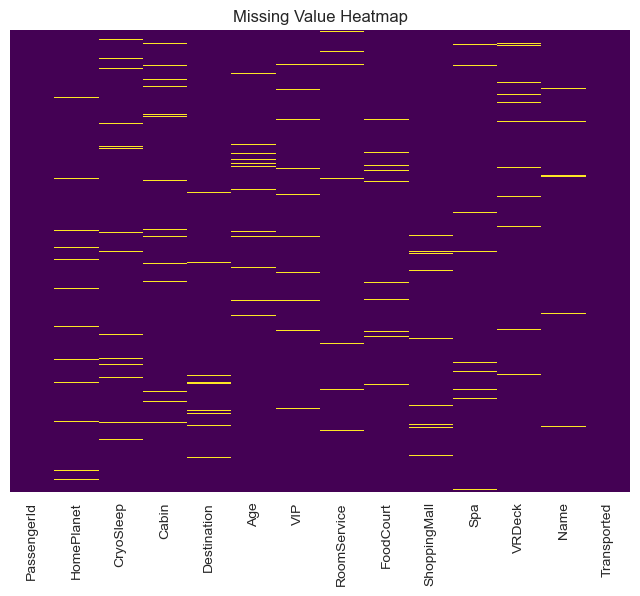

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(raw_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

## Data Preparation:
### Before we begin our EDA and data cleaning we need to do some housekeeping. We need to ensure that all the data types are in the correct format and we need to convert the rest into the correct datatypes

### Categorical Features:
- Homeplanet & Destination are categorical features with 3 unique values each thus we will be HotOne Encoding it for our model building phase. For now it is in the correct data type and we can leave it.
- Cryosleep & VIP are True False features and for the model building phase we will convert them into binary [0,1] features. For now we will nod convert them as we need to perform EDA on the numerical features
- Cabin feature needs to be split into the 3 separate features: Deck/floor, Room number and Side. The room number will be split into a string variable and for now it won't have any statistical values and thus we will only convert into ordinal feature after the EDA.
- Name is a string variable with no predictive feature thus we will be dropping it form our model
- The target variable is 'Transported' feature and it is in a boolean dtype and we will binary encode it

### Numerical Features:
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.These are all in float dtype and need no manipulation. However we will perform and exploratory data analysis to understand the distribution and relationship to the rest of the features

### Missing Values:
##### Our data has missing values which are less than 10% of the total data thus we can chose to drop all null. However considering that we only have 8000 rows of data and there is no pattern to the missing values(according to the heatmap) we can use data filling techniques
For numerical values we will use mean/median depending on the distribution of the feature, for categorical data we will use mode

For our EDA I want to look at all the data together and apply cleaning & preparation techniques to the entire dataset

In [39]:
raw_data.set_index('PassengerId',inplace=True)
raw_test.set_index('PassengerId',inplace=True)
train_indices = raw_data.index
test_indices = raw_test.index
test_indices

Index(['0013_01', '0018_01', '0019_01', '0021_01', '0023_01', '0027_01',
       '0029_01', '0032_01', '0032_02', '0033_01',
       ...
       '9260_01', '9262_01', '9263_01', '9265_01', '9266_01', '9266_02',
       '9269_01', '9271_01', '9273_01', '9277_01'],
      dtype='object', name='PassengerId', length=4277)

In [40]:
raw_df = pd.concat([raw_data,raw_test],axis = 0)
raw_df.sample(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
8678_02,Earth,False,F/1678/S,TRAPPIST-1e,24.0,False,201.0,0.0,621.0,0.0,NaN,Joana Mclarseney,NaN
7331_01,Mars,False,D/232/P,TRAPPIST-1e,61.0,False,1711.0,0.0,0.0,0.0,8.0,Mureah Nacke,False
6511_03,Earth,True,G/1055/P,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,Thelix Gainney,True
2055_06,Earth,True,G/330/P,TRAPPIST-1e,11.0,False,0.0,0.0,0.0,0.0,0.0,Janee Canton,False
0344_02,Europa,False,C/8/P,55 Cancri e,54.0,False,0.0,8.0,4391.0,4882.0,7.0,NaN,NaN
5480_01,Europa,False,NaN,TRAPPIST-1e,37.0,False,31.0,9307.0,0.0,904.0,11213.0,Avijava Ellcefulve,False
4163_01,Earth,True,G/683/S,55 Cancri e,16.0,False,0.0,0.0,0.0,0.0,0.0,Lyne Woodwinton,True
4167_01,Earth,False,NaN,PSO J318.5-22,NaN,NaN,0.0,440.0,0.0,0.0,334.0,Ninaha Deckerson,False
6324_01,Earth,False,E/420/S,NaN,31.0,False,19.0,509.0,0.0,0.0,177.0,Lesley Hinetthews,False


### Exloratory Data Analysis
we begin our data preparation by looking at the numerical data and how it is distributed beginning with looking at the correlation of the numerical features

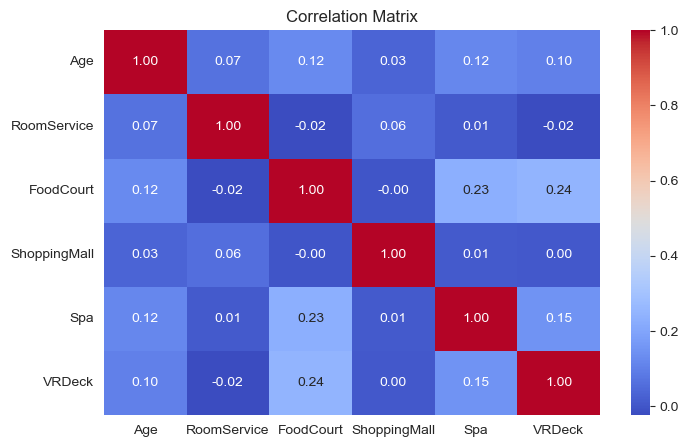

In [13]:
correlation_matrix = raw_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

No strong correlation detected. There is a slight positive relationship between spend at the FoodCourt and spend at the SHoppingMall and Spa.  Now we look at the pairplot of the numerical features

In [14]:
raw_df['Transported'].fillna(999,inplace=True)

<Figure size 1200x800 with 0 Axes>

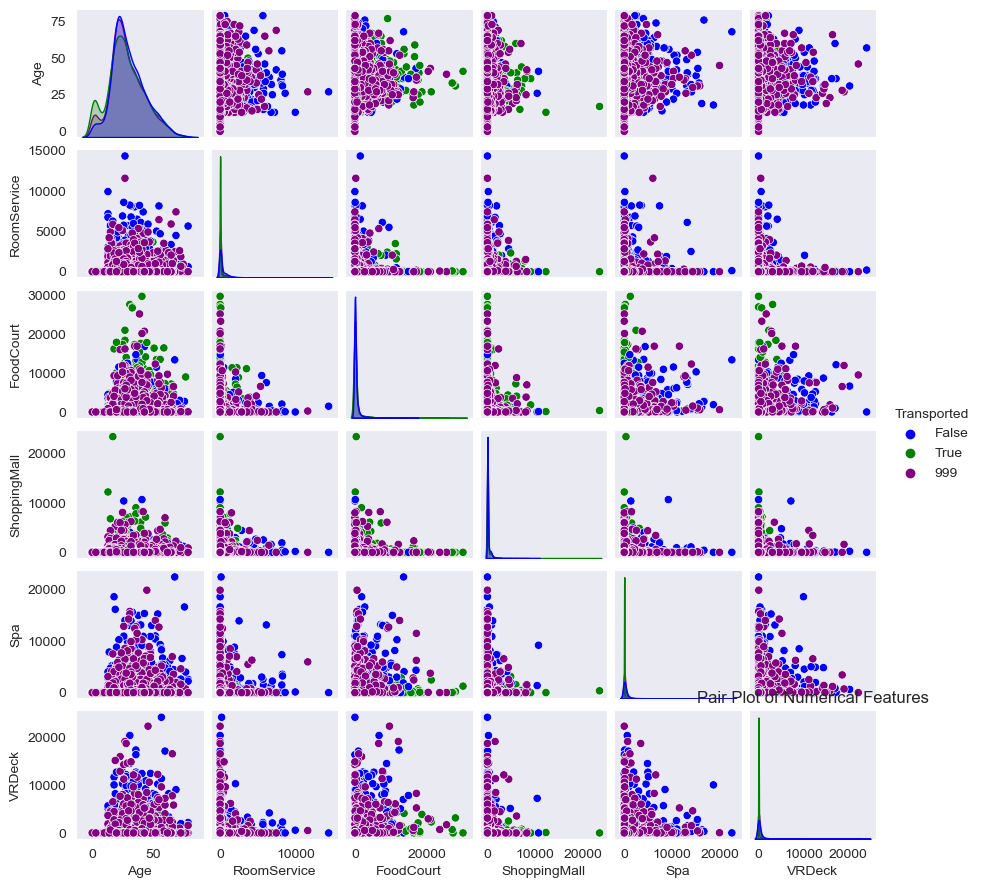

In [15]:
numerical_features = raw_df.select_dtypes(include=['float64', 'int64']).columns
colours = {True:'green',False:'blue',999:'purple'}
plt.figure(figsize=(12,8))
sns.pairplot(data=raw_df,vars=numerical_features,hue='Transported',height=1.5,palette=colours )
plt.title('Pair Plot of Numerical Features')
plt.show()

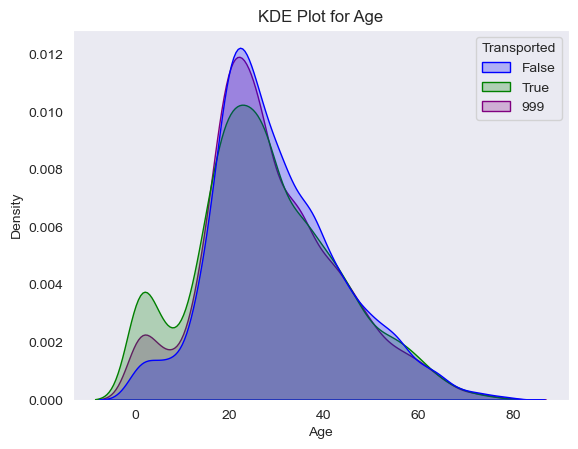

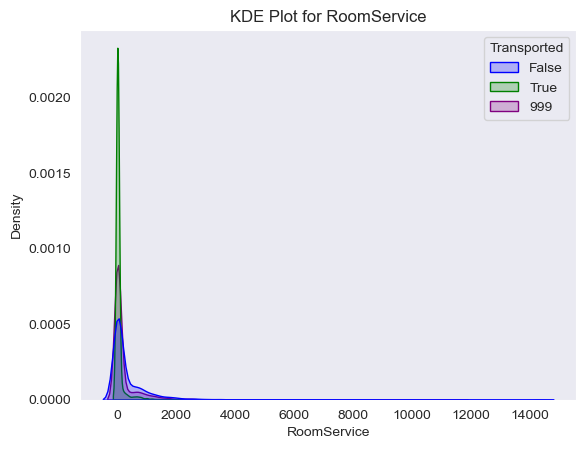

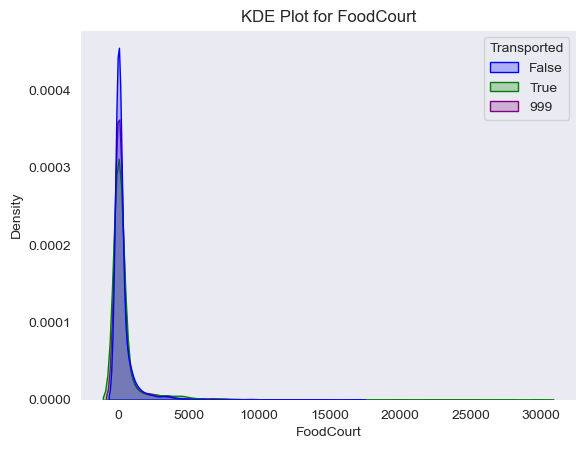

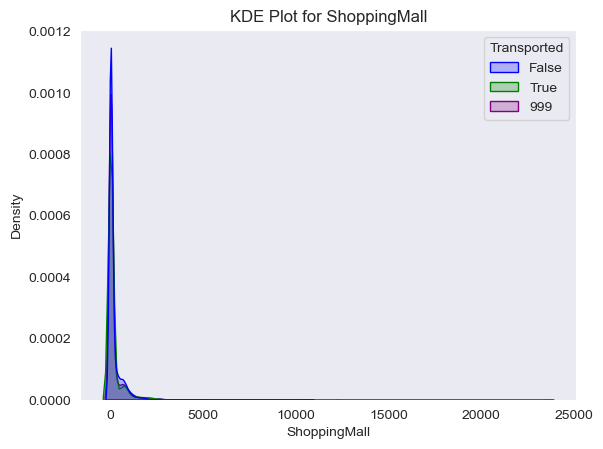

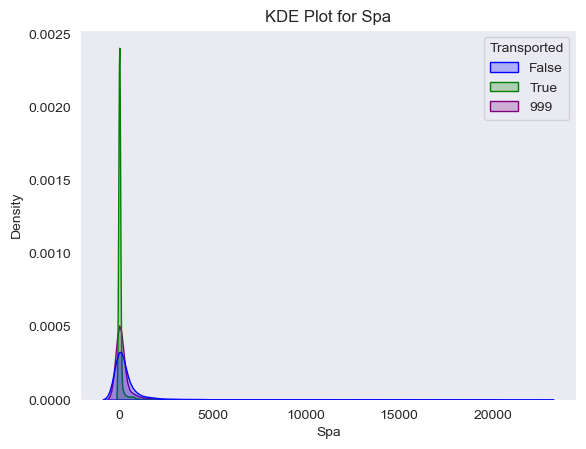

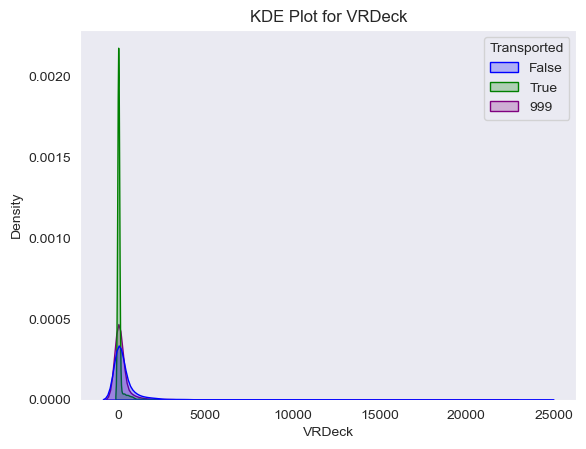

In [16]:
for column in numerical_features:
    sns.kdeplot(data = raw_df,x=raw_df[column], shade=True,hue='Transported',palette=colours)
    plt.title(f'KDE Plot for {column}')
    plt.show()

From the KDE plot we see that the numerical features have extreme outliers and the features are all skewewd to the right. We will try to log transform the data to see if we get normalized data

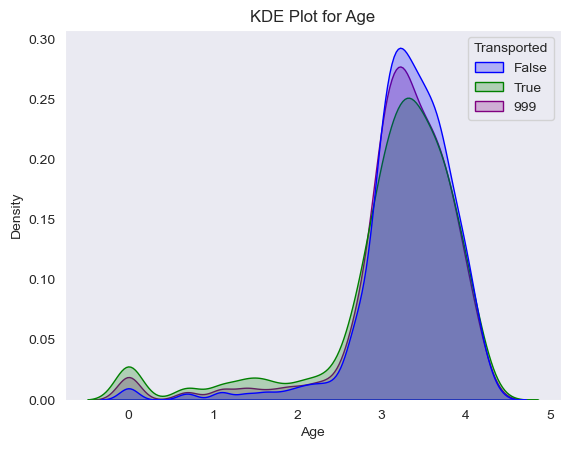

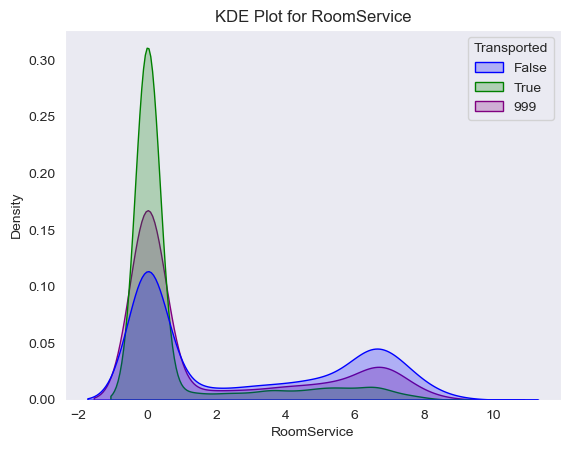

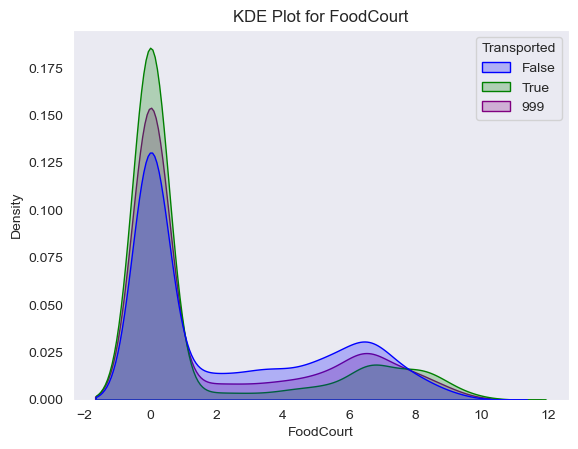

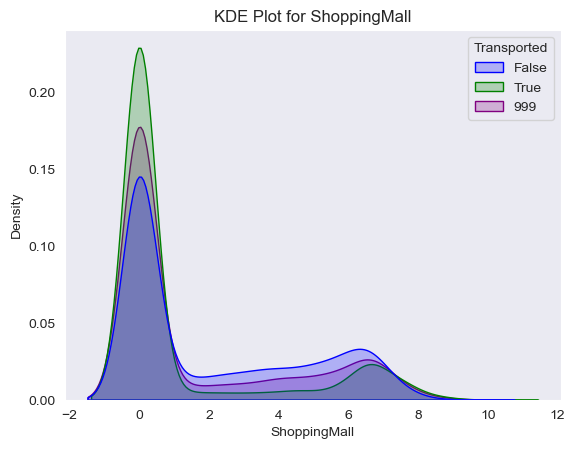

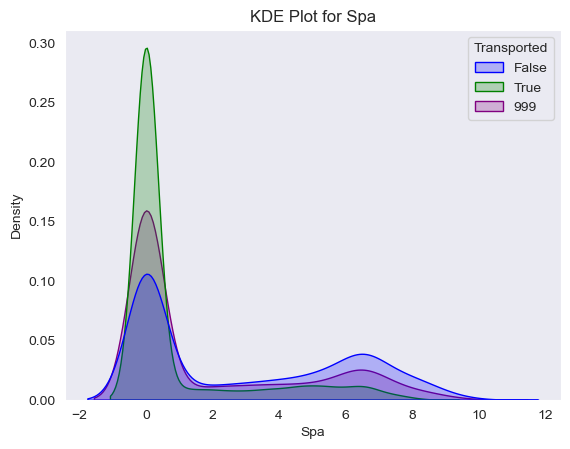

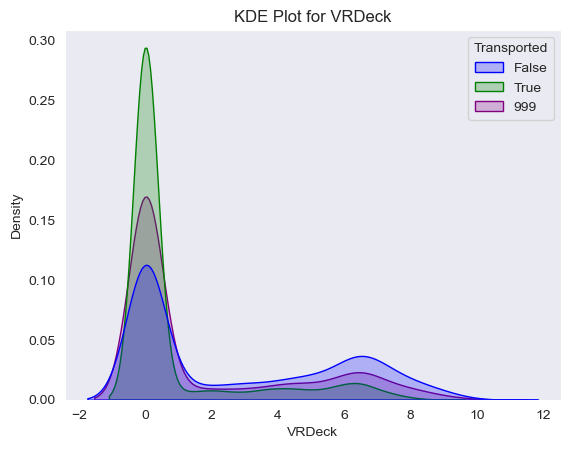

In [17]:
for column in numerical_features:
    sns.kdeplot(x=np.log(raw_df[column]+1), shade=True, data=raw_df,hue='Transported',palette=colours)
    plt.title(f'KDE Plot for {column}')
    plt.show()

As we see from the log transformed data, we have somewhat normalized data with a bimodal distribution which means that we might need further processing. For the prupose of this exercise, I will only use log transform and explore further scaling/tranformation techniques for the model building section

Next we will look at the boxplot to note 2 things:
- Impact of outliers and the IQR of teh numerical features
- Distribution of the numerical feature for one of the categorical features(VIP in this case)

What I want to look at is the distribution of the features for different parts

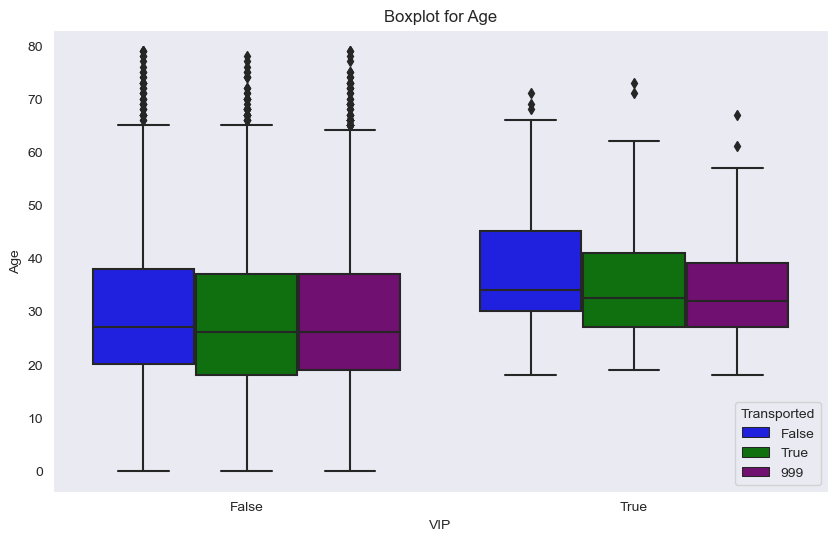

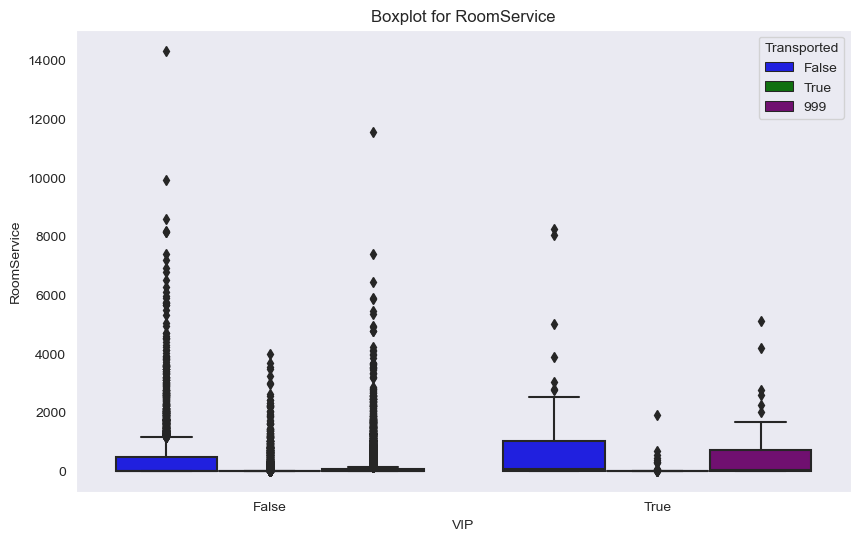

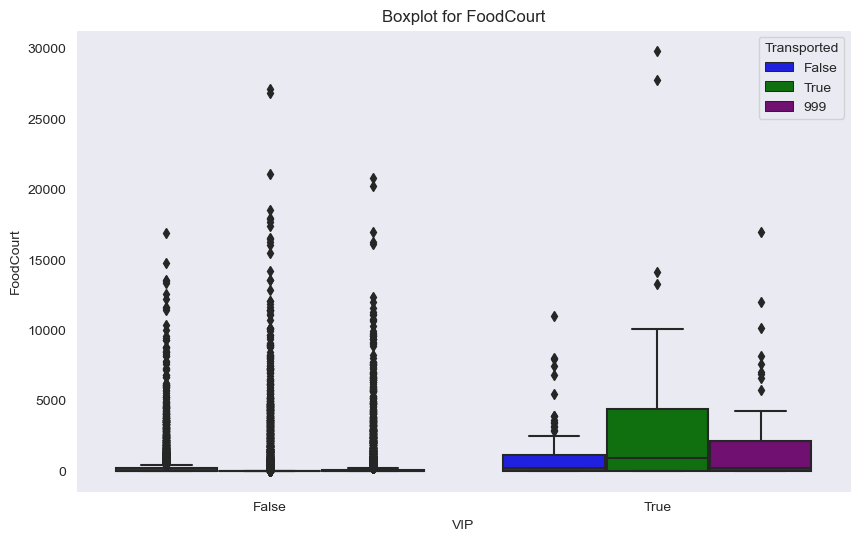

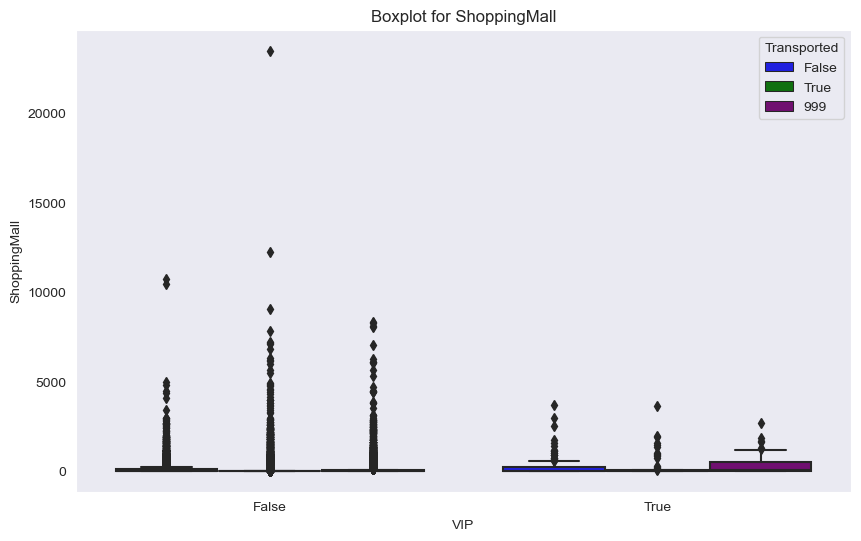

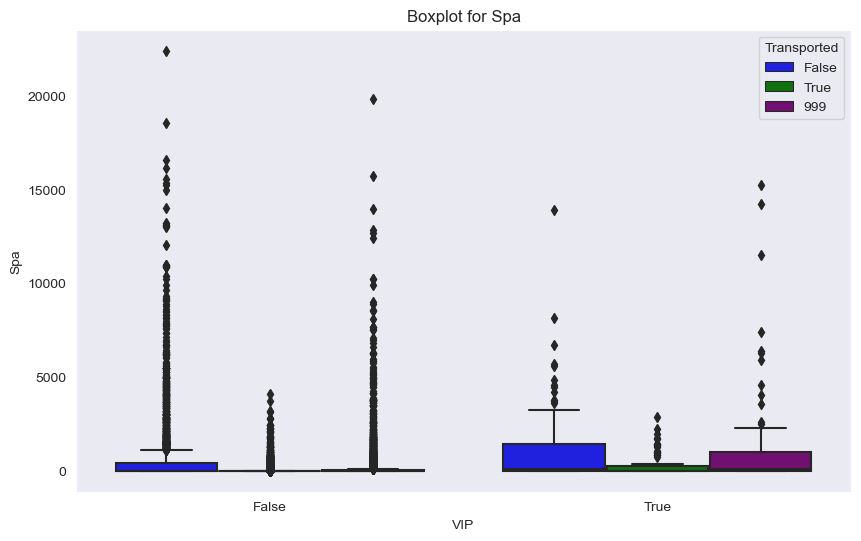

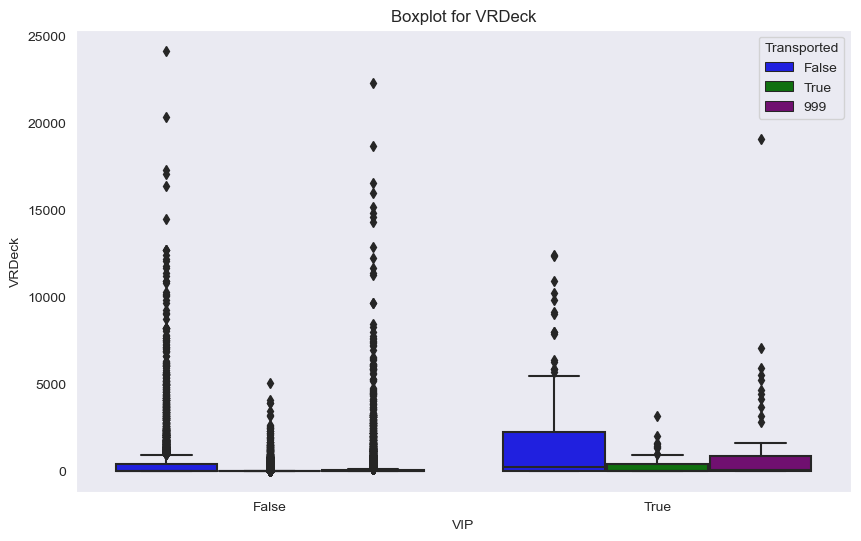

In [18]:
for column in numerical_features:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(x=raw_df['VIP'], y=column, data=raw_df,hue='Transported',palette=colours)
    plt.title(f'Boxplot for {column}')
    plt.show()

Similar to the KDE plots we will use log transform to see if there is still presence of outliers 

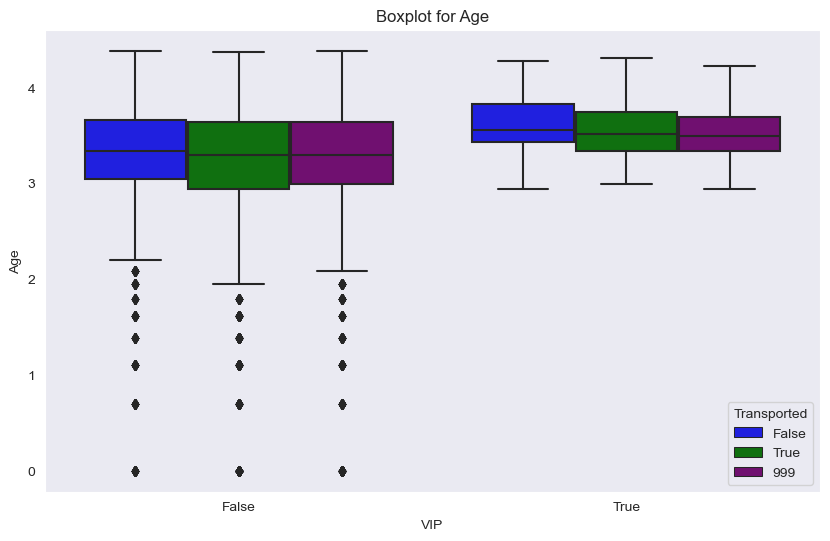

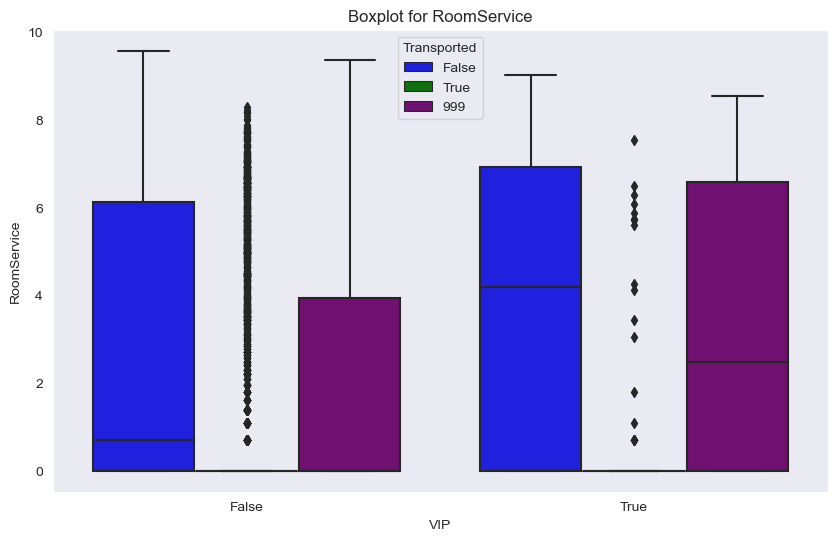

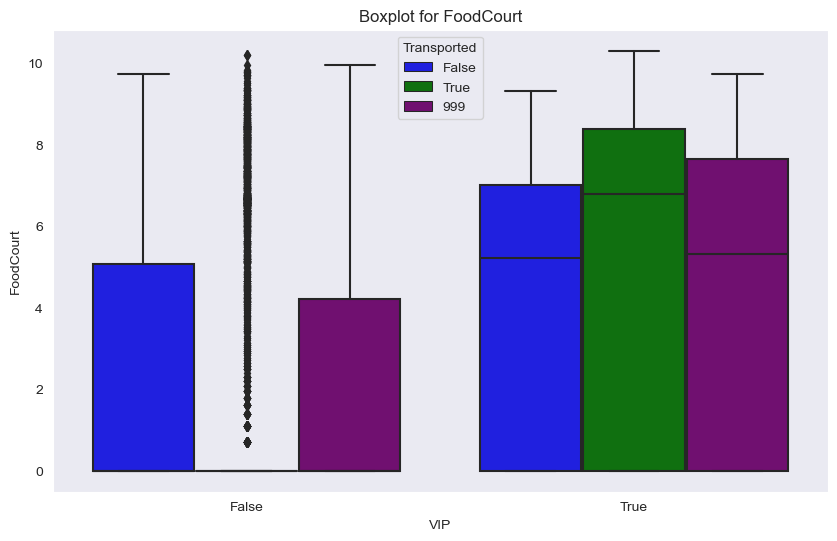

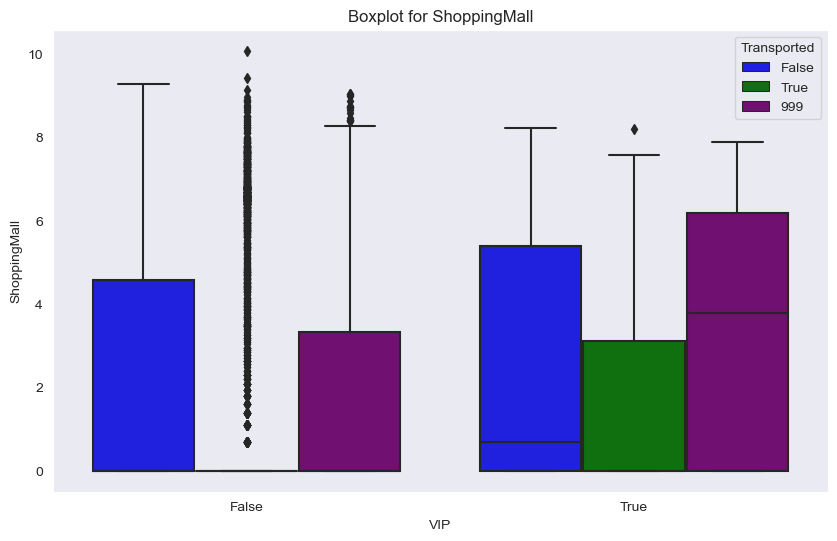

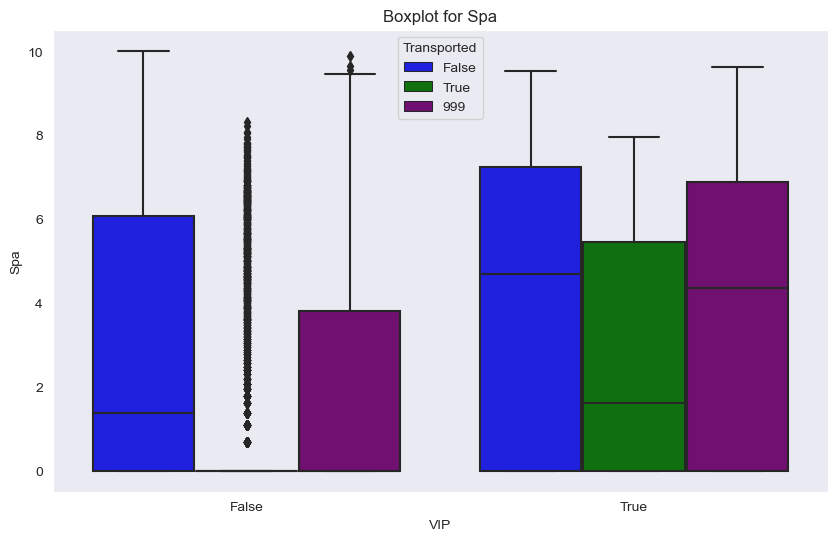

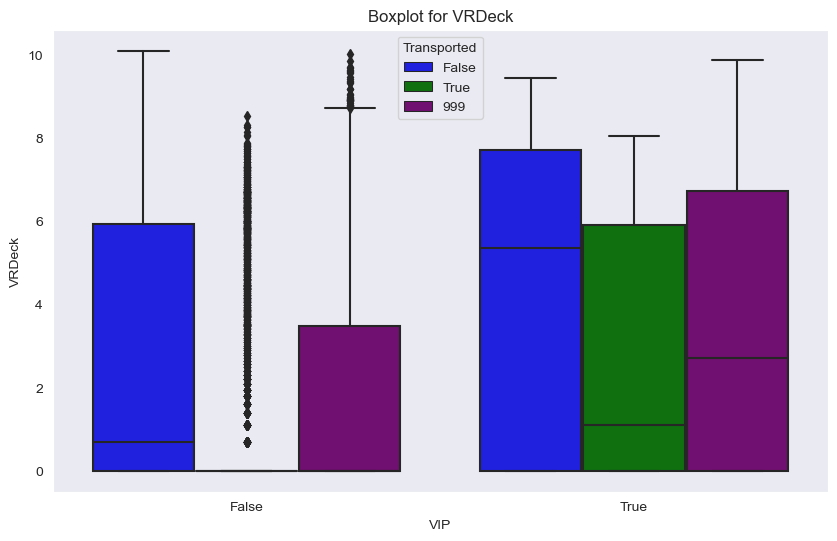

In [19]:
for column in numerical_features:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(x=raw_df['VIP'], y=np.log(raw_df[column]+1), data=raw_df,hue='Transported',palette=colours)
    plt.title(f'Boxplot for {column}')
    plt.show()

### Feature Engineering

In [43]:
ameneties_features = numerical_features.drop('Age', errors='ignore')
raw_df['num_ameneties'] = raw_df[ameneties_features].apply(lambda row: sum(row > 0), axis=1)
raw_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room_Num,Side,num_ameneties
PassengerId,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,5
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,4
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,4
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,1496,S,0
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,NaN,4
9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,296,P,0


In [44]:
raw_df['num_ameneties'].value_counts()

0    5457
3    3056
4    1859
2    1835
1     404
5     359
Name: num_ameneties, dtype: int64

In [45]:
ameneties_features

Index(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

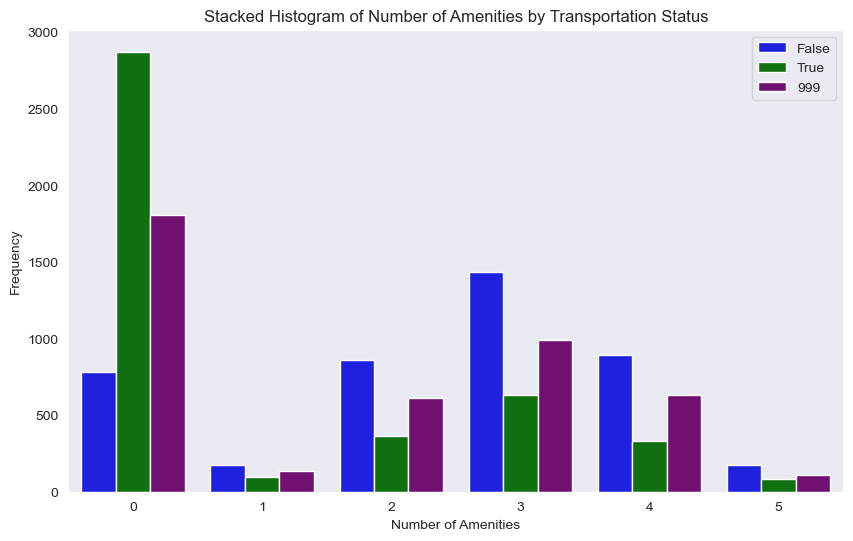

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_df, x='num_ameneties', hue='Transported', palette=colours)
plt.xlabel('Number of Amenities')
plt.ylabel('Frequency')
plt.title('Stacked Histogram of Number of Amenities by Transportation Status')
plt.legend()
plt.show()

In [46]:
raw_df['top_amenities'] = raw_df[ameneties_features].idxmax(axis=1)
raw_df['top_amenities'] = raw_df.apply(lambda row: 'None' if row[ameneties_features].eq(0).all() else row['top_amenities'], axis=1)
raw_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room_Num,Side,num_ameneties,top_amenities
PassengerId,,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0,None
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,5,Spa
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,4,Spa
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,4,Spa
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,5,Spa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,G,1496,S,0,None
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,NaN,4,FoodCourt
9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,D,296,P,0,None


In [25]:
raw_df['top_amenities'].value_counts()

None            4858
RoomService     2212
FoodCourt       1768
Spa             1426
ShoppingMall    1371
VRDeck          1335
Name: top_amenities, dtype: int64

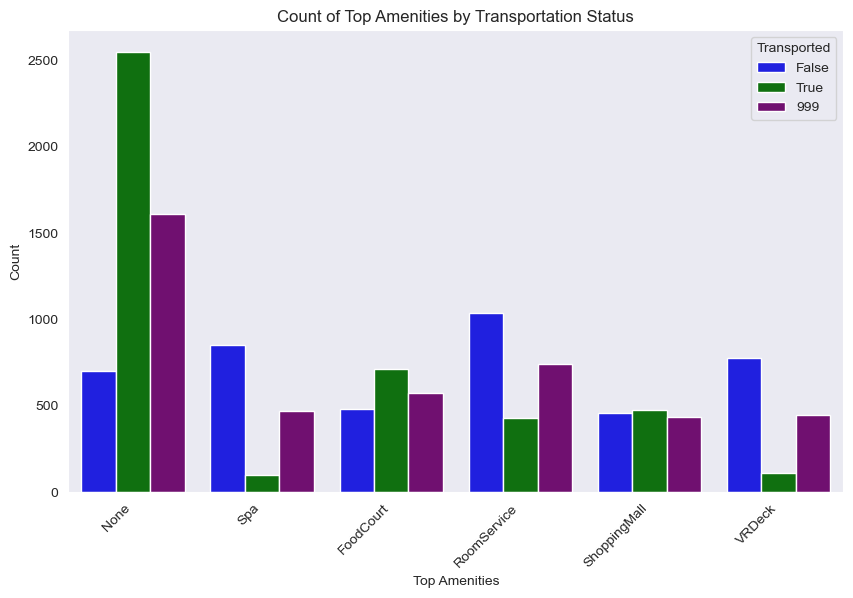

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=raw_df, x='top_amenities', hue='Transported', palette=colours)
plt.xlabel('Top Amenities')
plt.ylabel('Count')
plt.title('Count of Top Amenities by Transportation Status')
plt.legend(title='Transported', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

Considering that a clear pattern for our target variable is shown using our new feature it shows that it may prove to have predictive capabilities

#### Now we want to do further preprocessing and filling
For Age & Room_Num we will use median, for the log transformed features we will use mean. For the categorical features we will use mode

In [41]:
cabin_split = raw_df['Cabin'].str.split('/', expand=True)
cabin_split.columns=['Deck','Room_Num','Side']
raw_df = pd.concat([raw_df.drop(columns='Cabin'),cabin_split],axis=1)

In [59]:
raw_df['Room_Num'] = raw_df['Room_Num'].astype(float)

In [49]:
raw_df[ameneties_features] = np.log(raw_df[ameneties_features]+1)
raw_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room_Num,Side,num_ameneties,top_amenities
PassengerId,,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False,B,0,P,0,None
0002_01,Earth,False,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,Juanna Vines,True,F,0,S,5,Spa
0003_01,Europa,False,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,Altark Susent,False,A,0,S,4,Spa
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,Solam Susent,False,A,0,S,4,Spa
0004_01,Earth,False,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,Willy Santantines,True,F,1,S,5,Spa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Jeron Peter,NaN,G,1496,S,0,None
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.000000,6.742881,2.890372,2.397895,4.976734,Matty Scheron,NaN,NaN,NaN,NaN,4,FoodCourt
9271_01,Mars,True,55 Cancri e,NaN,False,0.000000,0.000000,0.000000,0.000000,0.000000,Jayrin Pore,NaN,D,296,P,0,None


In [63]:
raw_df['Age'].fillna(raw_df['Age'].median(), inplace=True)
raw_df['Room_Num'].fillna(raw_df['Room_Num'].median(), inplace=True)
for feature in ameneties_features:
    raw_df[feature].fillna(raw_df[feature].mean(), inplace=True)
categorical_features = raw_df.select_dtypes(include=['object']).columns.drop('Transported')
for feature in categorical_features:
    raw_df[feature].fillna(raw_df[feature].mode()[0], inplace=True)

raw_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room_Num,Side,num_ameneties,top_amenities
PassengerId,,,,,,,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False,B,0.0,P,0,None
0002_01,Earth,False,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,Juanna Vines,True,F,0.0,S,5,Spa
0003_01,Europa,False,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,Altark Susent,False,A,0.0,S,4,Spa
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,Solam Susent,False,A,0.0,S,4,Spa
0004_01,Earth,False,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,Willy Santantines,True,F,1.0,S,5,Spa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Jeron Peter,NaN,G,1496.0,S,0,None
9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.000000,6.742881,2.890372,2.397895,4.976734,Matty Scheron,NaN,F,431.0,S,4,FoodCourt
9271_01,Mars,True,55 Cancri e,27.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,Jayrin Pore,NaN,D,296.0,P,0,None


#### Now that we have cleaned and filled our data we need to split back into train and test

In [65]:
train_indices = raw_data.index
test_indices = raw_test.index

df_train = raw_df[raw_df.index.isin(train_indices)]
df_test = raw_df[raw_df.index.isin(test_indices)]
df_train.to_csv('Train_clean.csv')
df_test.to_csv('Test_clean.csv')